## Import library

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

## Dataset

### Load cifar10

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data() #載入cifar到程式中

In [ ]:
print("train data:",'images:',x_train.shape,
      " labels:",y_train.shape)
print("test  data:",'images:',x_test.shape ,
      " labels:",y_test.shape)

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


### Normalize

In [ ]:
#把0-255的像素轉換到0-1之間
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [ ]:
x_train_norm.shape

(50000, 32, 32, 3)

### One hot encode

In [ ]:
#進行One hot encode 作為label
y_train_OneHot = to_categorical(y_train)
y_test_OneHot = to_categorical(y_test)

## Data Argument

In [ ]:
data_augmentation = tf.keras.models.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"), #水平與垂直翻轉
])

## Model

In [ ]:
#建立模型: 卷積網路
backbone = tf.keras.models.Sequential([
  # 資料擴增 -> 只在train生效
  #data_augmentation,
  # Model
  tf.keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', input_shape=(32, 32, 3), padding='same'), #卷積層採用padding，透過步伐為1，尺寸3x3的kernal來產生32個特徵
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), #把卷積層的輸出減少一半
  tf.keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same'), #卷積層採用padding，透過步伐為1，尺寸3x3的kernal來產生64個特徵
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), #把卷積層的輸出減少一半
  tf.keras.layers.Conv2D(128, (5,5), strides=1, activation='relu', padding='same'), #卷積層採用padding，透過步伐為1，尺寸5x5的kernal來產生128個特徵
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), #把卷積層的輸出減少一半
  tf.keras.layers.Dropout(0.4), #40% Dropout (40%的節點隨機輸出歸零)
  tf.keras.layers.Flatten(), #把Convolution的結果壓扁
  tf.keras.layers.Dense(512, activation='relu'), #全連接層(2048 -> 512)，使用relu做激勵函數
  tf.keras.layers.Dense(10, activation='softmax') #全連接層輸出 (十類分類指數)，使用softmax做激勵函數
])

In [ ]:
backbone.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 4, 4, 128)      

In [ ]:
model = tf.keras.models.Sequential([
    data_augmentation,
    backbone
])

### Load weight



In [ ]:
try:
    model.load_weights("./cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


## Training


In [ ]:
model.compile(optimizer='adam',  #用 adam 優化器
              loss='categorical_crossentropy', #指定損失函式
              metrics=['accuracy']) #評估指標用「正確度(答對的比率)」

In [ ]:
train_history = model.fit(x_train_norm, y_train_OneHot,
                          validation_split=0.2, #20%的測試資料拿去當驗證集
                          epochs=10, #訓練：10 epochs (訓練資料跑完十次)
                          batch_size=128, #一次讀進的資料量
                          verbose=1) #進度條

Epoch 1/10
313/313 [==============================] - 165s 520ms/step - loss: 1.7126 - accuracy: 0.3674 - val_loss: 1.4464 - val_accuracy: 0.4773
Epoch 2/10
313/313 [==============================] - 158s 503ms/step - loss: 1.3496 - accuracy: 0.5116 - val_loss: 1.1976 - val_accuracy: 0.5714
Epoch 3/10
313/313 [==============================] - 159s 508ms/step - loss: 1.1991 - accuracy: 0.5677 - val_loss: 1.1949 - val_accuracy: 0.5731
Epoch 4/10
313/313 [==============================] - 164s 523ms/step - loss: 1.1105 - accuracy: 0.6023 - val_loss: 1.0536 - val_accuracy: 0.6310
Epoch 5/10
313/313 [==============================] - 158s 503ms/step - loss: 1.0387 - accuracy: 0.6279 - val_loss: 0.9798 - val_accuracy: 0.6587
Epoch 6/10
313/313 [==============================] - 158s 506ms/step - loss: 0.9791 - accuracy: 0.6507 - val_loss: 0.9611 - val_accuracy: 0.6576
Epoch 7/10
313/313 [==============================] - 157s 503ms/step - loss: 0.9393 - accuracy: 0.6639 - val_loss: 0.9155 -

### Accuracy

In [ ]:
def show_acc_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

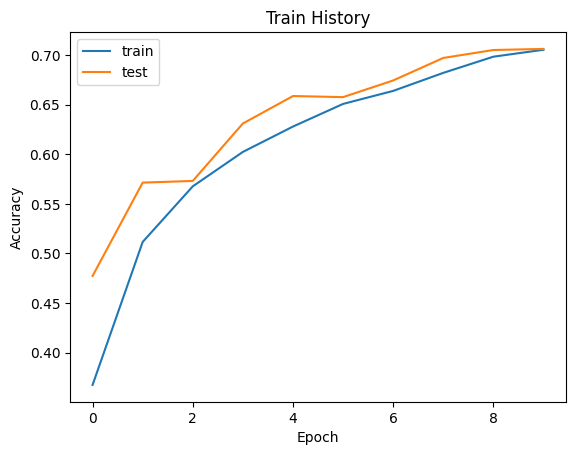

In [ ]:
show_acc_train_history('accuracy','val_accuracy')

### Loss

In [ ]:
def show_loss_train_history(train_loss,test_loss):
    plt.plot(train_history.history[train_loss])
    plt.plot(train_history.history[test_loss])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

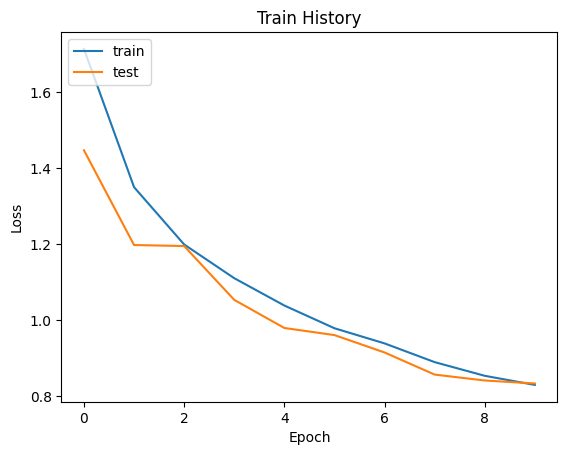

In [ ]:
show_loss_train_history('loss','val_loss')

## Test

In [ ]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

### On test set

In [ ]:
loss, acc = model.evaluate(x_test_norm,  y_test_OneHot, verbose=0) #評估測試組的平均損失與正確率
print("Loss:", loss)
print("Accuracy", acc)

Loss: 0.8468765616416931
Accuracy 0.703000009059906


In [ ]:
prediction=np.argmax(model.predict(x_test_norm), axis=-1)
prediction[:10]

313/313 [==============================] - 10s 32ms/step


array([7, 8, 8, 0, 6, 6, 1, 6, 3, 1])

### Have a glance

In [ ]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')

        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

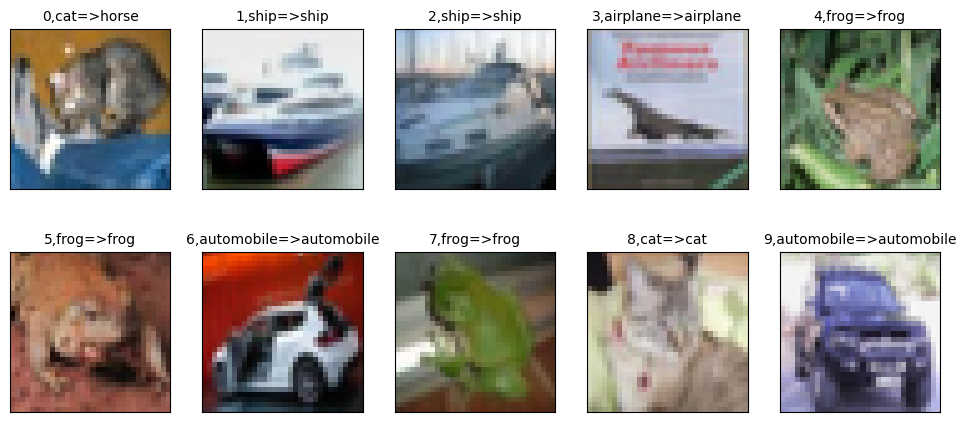

In [ ]:
plot_images_labels_prediction(x_test_norm, y_test,
                              prediction,0,10)

In [ ]:
Predicted_Probability=model.predict(x_test_norm)

313/313 [==============================] - 9s 30ms/step


### Single image

In [ ]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_test_norm[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: horse


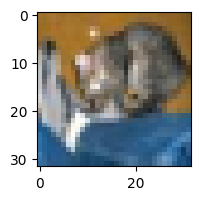

airplane Probability:0.011127605
automobile Probability:0.006144510
bird Probability:0.016507259
cat Probability:0.230124518
deer Probability:0.036914188
dog Probability:0.282722980
frog Probability:0.025838396
horse Probability:0.356445789
ship Probability:0.003316106
truck Probability:0.030858602


In [ ]:
show_Predicted_Probability(y_test,prediction,
                           x_test_norm,Predicted_Probability,0)

### Confusion matrix

In [ ]:
import pandas as pd
print(label_dict)
pd.crosstab(y_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,723,27,50,32,18,7,11,18,69,45
1,6,838,2,19,6,3,12,5,7,102
2,59,5,443,86,201,64,103,13,12,14
3,13,15,38,492,102,190,84,40,8,18
4,13,3,37,45,787,22,27,53,9,4
5,5,7,27,168,72,629,31,43,4,14
6,4,1,22,52,79,28,801,3,4,6
7,10,6,23,62,100,51,11,722,0,15
8,40,70,20,10,19,16,9,6,767,43


## Save weight

In [ ]:
model.save_weights("./cifarCnnModel.h5")